In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import minimize
from scipy.signal import medfilt
from astropy import units as u
from tqdm import tqdm_notebook
from scipy.signal import find_peaks

In [19]:
%load_ext autoreload
%autoreload 2
import stella

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = np.load('final_set.npy', allow_pickle=True)
#CATALOG = Table.read('/Users/arcticfox/Documents/youngStars/final_southern_catalog.txt',
#                    format='ascii')

In [3]:
TICS = data[0]
TIME = data[1]
FLUX = data[2]
ERR = data[3]
PREDS = data[4]

In [4]:
ff = stella.FitFlares(TICS, TIME, FLUX,ERR, PREDS)

In [20]:
ff.identify_flare_peaks()

Finding & Fitting Flares:   1%|          | 32/3372 [00:00<02:17, 24.36it/s]/Users/arcticfox/Documents/GitHub/stella/stella/mark_flares.py:179: RuntimeWarning: divide by zero encountered in true_divide
  # REMOVES LOCAL STELLAR VARIABILITY TO FIT FLARE
Finding & Fitting Flares:   9%|▉         | 313/3372 [00:10<01:32, 32.97it/s]/Users/arcticfox/Documents/GitHub/stella/stella/utils.py:36: RuntimeWarning: overflow encountered in exp
  return amp * np.exp( -(time - t0) / fall ) + flux
/Users/arcticfox/Documents/GitHub/stella/stella/mark_flares.py:119: RuntimeWarning: overflow encountered in square
  return np.sum( (y-m)**2.0 / yerr**2.0 )
//anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]
Finding & Fitting Flares:  75%|███████▍  | 2516/3372 [01:19<00:24, 34.56it/s]/Users/arcticfox/Documents/GitHub/stella/stella/utils.py:36: RuntimeWarning: overflow encountered in mult

In [25]:
ff.flare_table

Target_ID,tpeak,amp,dur,rise,fall,prob
float64,float64,float64,float64,float64,float64,float64
134947.0,1601.7483989534796,1.0163949120448559,0.06878532666536541,0.0001,0.0033867628010402365,0.6581094563007355
134947.0,1602.402579493951,1.0734355219577587,0.06885061055717333,0.0001,0.0019237877228797378,1.0
134947.0,1603.1470391214405,1.0318983595794284,0.07643261803604584,0.0001,0.0018664067157423787,0.9845796227455139
134947.0,1604.0790016014837,1.0092909849309202,0.06876673452759088,0.0001,0.0025680767297813346,0.8574218153953552
134947.0,1606.0109796937465,1.01262761676585,0.06876461619536584,0.0001,0.0013270387372043705,0.6022118031978607
134947.0,1606.1234814866755,1.0743668403622861,0.06884698124437799,0.0001,0.0017957768295372358,1.0
134947.0,1606.5970999322265,1.0280103034391757,0.06878290670368586,0.0001,0.001473453324395175,0.9986187815666199
134947.0,1606.827658928786,1.0172897323486838,0.0701638217255538,0.0001,0.0019899374459804832,0.8240664899349213
134947.0,1606.9151602117338,1.0205561368487543,0.0701748006571043,0.0001,0.002639331952893016,0.9998001456260681


In [27]:
fts = stella.FindTheSpots(TICS, TIME, FLUX, ERR)
fts.run_LS()
fts.phase_lightcurve()

Finding most likely periods:  48%|████▊     | 1607/3372 [00:49<00:57, 30.56it/s]//anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
Getting Phases: 100%|██████████| 3372/3372 [00:54<00:00, 61.31it/s]


In [ ]:
bad = np.unique([67801852, 111835484, 99211241,140072113, 148158540, 169468632,
                 255134616, 259862349, 400445441, 129116176, 67801852, 111835484, 
                 99211241,140072113, 148158540, 169468632,
                 255134616, 259862349, 400445441])

In [88]:
peak_phase = np.array([])
peak_amp   = np.array([])

for i, tic in enumerate(fts.LS_results['Target_ID'].data):
    flares = ff.flare_table[ff.flare_table['Target_ID']==tic]
    peaks  = flares['tpeak'].data
    amps   = flares['amp'].data
    for a, p in zip(amps, peaks):
        ti = np.where(fts.time[i] == p)[0]
        if len(ti) > 0:
            peak_phase = np.append(peak_phase, fts.phases[i][ti])
            peak_amp   = np.append(peak_amp, a)
#for i in range(len(TICS)):
#    ind = np.where(TICS == TICS[i])[0][0]
#    if fts.LS_results['flags'].data[i] == 1:
#        subtable = ff.flare_table[ff.flare_table['Target_ID']==TICS[i]]
#        for t in ff.flare_table[ff.flare_table['Target_ID']==TICS[i]]['tpeak']:
#            ti = np.where(TIME[ind] == tpeak)[0]
#            peak_phase = np.append(peak_phase, fts.phases[ind][ti])

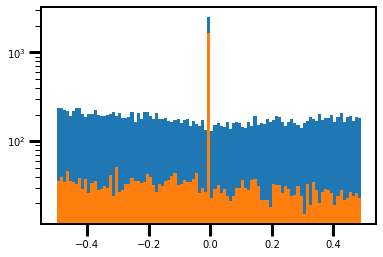

In [101]:
small = np.where(peak_amp-1<0.05)
big = np.where(peak_amp-1 >= 0.05)

plt.hist(peak_phase[small], bins=np.arange(-0.5,0.5,0.01))
plt.hist(peak_phase[big], bins=np.arange(-0.5,0.5,0.01))

plt.yscale('log')
plt.show()